In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import ticker
import seaborn as sns
# https://tslearn.readthedocs.io/en/stable/gen_modules/clustering/tslearn.clustering.TimeSeriesKMeans.html
# https://tslearn.readthedocs.io/en/stable/auto_examples/clustering/plot_kmeans.html
# https://tslearn.readthedocs.io/en/stable/variablelength.html
from tslearn.clustering import TimeSeriesKMeans, silhouette_score

/home/dk/projects/snis-analysis-2021/.venv/lib/python3.10/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [13]:
def get_X(df, ts_length=20):
    ccols = {
        length: [
            col
            for col in df.columns
            if len(df[~df[col].isna()]) >= length
        ]
        for length in range(1, 27)
    }
    cols = ccols[ts_length]
    X = df[cols].dropna().T.values
    index = df[cols].dropna().index
    return X, index, cols


def get_clusters(X, n_clusters=4, max_iter=10, n_init=1):
    kmeans = TimeSeriesKMeans(
        n_clusters=n_clusters,
        max_iter=max_iter,
        random_state=1,
        n_init=n_init,
        metric="dtw",
    )
    y_pred = kmeans.fit_predict(X)
    return kmeans, y_pred

In [3]:
df = pd.read_csv("data/processed_tmr_mun3.csv")
df = df.pivot(
    index=["ano_referencia"],
    columns=["id_municipio"],
    values="tarifa_media_trend",
)
df

id_municipio,1100015,1100023,1100031,1100049,1100056,1100064,1100072,1100080,1100098,1100106,...,5221577,5221601,5221700,5221809,5221858,5221908,5222005,5222203,5222302,5300108
ano_referencia,,,,,,,,,,,,,,,,,,,,,
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.112664
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.526404,4.556507,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.466133
1997,NaN,NaN,NaN,NaN,NaN,1.142151,NaN,3.204982,4.617754,-0.581896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.664306
1998,NaN,NaN,NaN,NaN,NaN,1.579322,NaN,3.371271,4.679002,0.605499,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.693831
1999,NaN,NaN,NaN,NaN,NaN,2.016493,NaN,3.537560,4.740249,2.091890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.648016
2000,NaN,NaN,NaN,3.495083,NaN,2.453664,NaN,3.703849,4.801497,2.982706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.629639
2001,NaN,5.186575,3.539023,4.027266,4.836112,2.890835,NaN,3.870138,4.862744,3.873522,...,NaN,NaN,3.545271,NaN,3.371278,NaN,NaN,NaN,NaN,3.664297
2002,NaN,5.027136,4.512676,4.559448,5.039069,4.075070,NaN,4.915461,4.937119,4.900700,...,NaN,NaN,3.976086,NaN,3.637979,NaN,NaN,NaN,NaN,3.792316
2003,NaN,5.090351,5.486329,5.091631,5.482659,5.014721,NaN,6.203513,5.038589,5.369255,...,NaN,4.280485,4.378402,NaN,3.908650,NaN,4.370960,NaN,NaN,4.041119


In [14]:
X, ano_referencia, cols = get_X(df, ts_length=20)
print(X)
print(ano_referencia)
print(cols)

[[5.02713628 5.09035102 5.33660577 ... 4.9337559  4.5194946  4.17441331]
 [4.51267596 5.48632934 7.26365986 ... 5.85898306 5.54579672 5.17537761]
 [4.55944839 5.09163086 5.09163086 ... 5.09163086 5.09163086 5.09163086]
 ...
 [3.97608614 4.37840216 4.60204069 ... 7.09599795 6.93557646 6.64636296]
 [3.6379794  3.90865045 4.13326842 ... 7.19459566 6.99072908 6.67281165]
 [3.79231554 4.04111862 4.41307883 ... 5.9841949  6.12216729 6.2421012 ]]
Int64Index([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
           dtype='int64', name='ano_referencia')
[1100023, 1100031, 1100049, 1100056, 1100064, 1100080, 1100098, 1100106, 1100114, 1100122, 1100130, 1100148, 1100155, 1100189, 1100205, 1100254, 1100262, 1100288, 1100296, 1100304, 1100338, 1100346, 1100403, 1100502, 1100601, 1100809, 1100908, 1100940, 1101203, 1101401, 1101435, 1101450, 1101484, 1101559, 1101708, 1200104, 1200138, 1200179, 1200203, 1200252, 1

In [8]:
n_init = 1
max_iter = 10

historic_kmeans = {}
historic_scores = []

for n_clusters in range(3, 27):
    kmeans, y_pred = get_clusters(
        X=X,
        n_clusters=n_clusters,
        max_iter=max_iter,
        n_init=n_init,
    )
    print(n_clusters, kmeans.inertia_)
    historic_scores.append((n_clusters, kmeans.inertia_))
    historic_kmeans[n_clusters] =  kmeans, y_pred

3 7.587958205241615
4 5.447617402086235
5 4.13122742317538
6 3.7383130602431476
7 2.860657316459689
8 2.5021449229180215
9 2.289245015071368
10 2.076610180841326
11 1.8863022542599919
12 1.7822529658439314
13 1.7213407821083282
14 1.661179049993859
15 1.6324674842242375
16 1.5722546002610345
17 1.5319533184839778
18 1.4604141988685813
19 1.3831718979873564
20 1.273189051344477
21 1.2389006692897282
22 1.1961032979272654
23 1.1491069770027929
24 1.1260436596892476
25 1.0789312204902362
26 1.0610819552611463


In [9]:
df_scores = pd.DataFrame.from_records(
    historic_scores,
    columns=["n_clusters", "inertia"],
)
df_scores

,n_clusters,inertia
0,3,7.587958
1,4,5.447617
2,5,4.131227
3,6,3.738313
4,7,2.860657
5,8,2.502145
6,9,2.289245
7,10,2.076610
8,11,1.886302
9,12,1.782253


<AxesSubplot: xlabel='n_clusters', ylabel='inertia'>

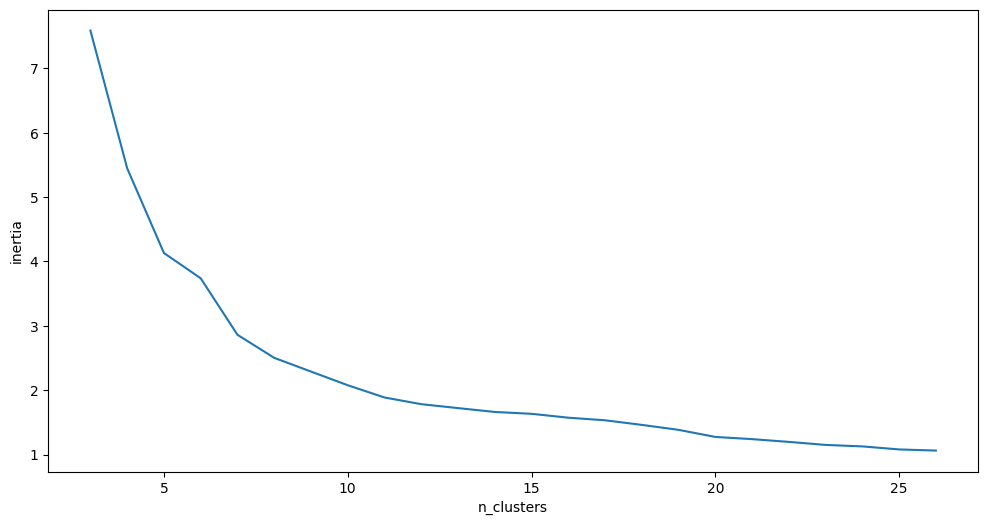

In [10]:
f, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(
    data=df_scores,
    x="n_clusters",
    y="inertia",
)

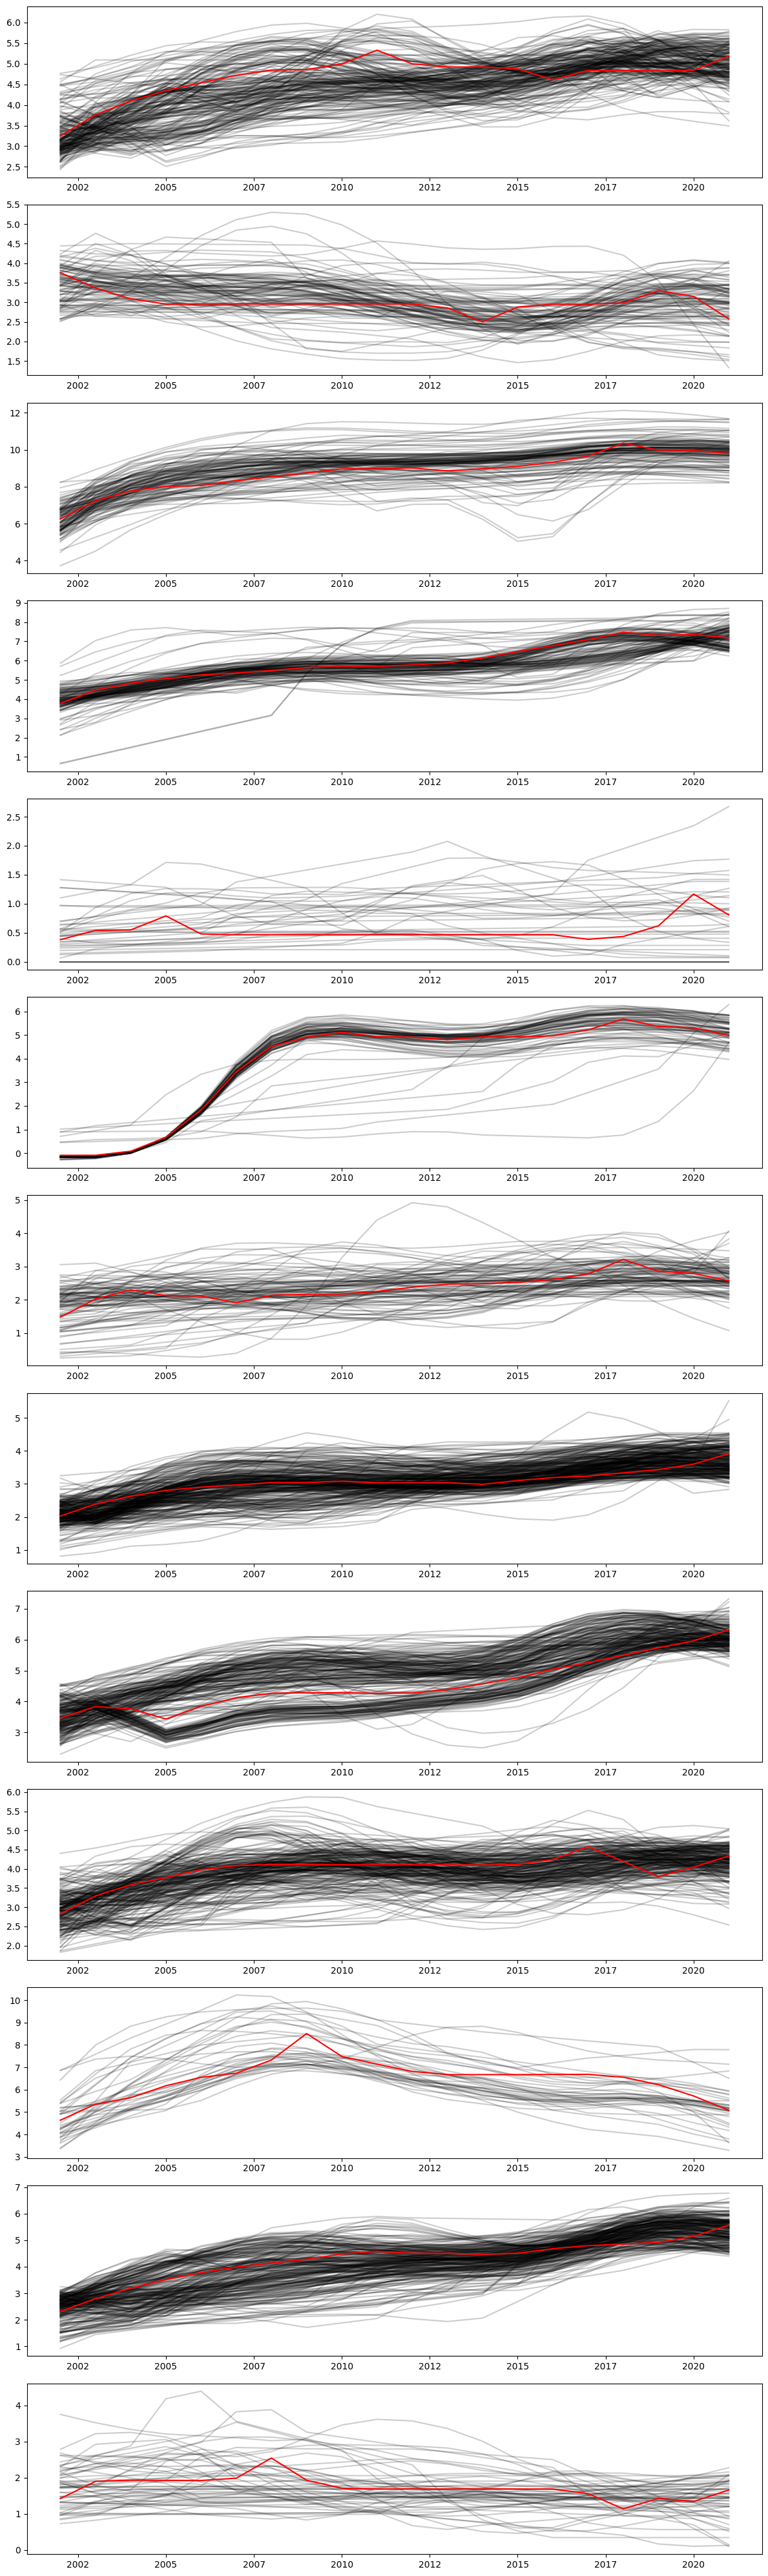

In [12]:
n_clusters = 13
kmeans, y_pred = historic_kmeans[n_clusters]

f, (axes) = plt.subplots(nrows=n_clusters, figsize=(12, 40))
for cluster_n in range(n_clusters):
    for ts in X[y_pred == cluster_n]:
        axes[cluster_n].plot(
            ano_referencia,
            ts.ravel(),
            color="black",
            alpha=0.2,
        )
    axes[cluster_n].plot(
        ano_referencia,
        kmeans.cluster_centers_[cluster_n].ravel(),
        "r-",
    )
    axes[cluster_n].xaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, pos: f"{int(x)}")
    )
f.tight_layout()

filename = (
    "clusters "
    f"max_iter-{max_iter} "
    f"n_init-{n_init} "
    f"n_clusters-{n_clusters}.png"
)
plt.savefig(filename)

In [19]:
df_clusters = pd.DataFrame({"id_municipio": cols, "cluster": y_pred})
df_clusters.to_csv("data/clusters.csv", index=False)
df_clusters

,id_municipio,cluster
0,1100023,10
1,1100031,10
2,1100049,0
3,1100056,10
4,1100064,10
...,...,...
1828,5220603,8
1829,5221403,8
1830,5221700,3
1831,5221858,3
